In [1]:
from shapely.geometry import Point
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import numpy as np

In [2]:
%%time
june_loc = pd.read_pickle("../data/june.pkl")
# may_trip = pd.read_csv("../data/may_trip.csv")

CPU times: user 978 ms, sys: 1.87 s, total: 2.85 s
Wall time: 3.85 s


In [8]:
#make a list of datetimes with datetime function 
start = datetime(2019, 6, 1, 0, 0)
end = datetime(2019, 6, 1, 1, 0)
delta = timedelta(hours=1)
timelist = []
timenamelist = []
while start <= end:
    timelist.append(start)
    timenamelist.append(start.strftime("%Y-%m-%d-%H-%M"))
    start += delta
# print(timelist)
# print(timenamelist)

In [9]:

#goal of function: using list of time frames, in this case, days, make a dataframe containing
#info about the location for each scooter, for each day


#make dictionary of dataframes using base dataframe and a user-defined segments_of_time_list
#from cell above
def make_day_df(datetime_list, timenames_list, dataframe, colname):
    resultslist = {} #turn into dictionary
    x = 0
    y = 1
    z = 0
    while x in range(0,len(datetime_list)-1):
        starttime = datetime_list[x]
        endtime = datetime_list[y]
        mask = (dataframe[colname] > starttime) & (dataframe[colname] <= endtime)
        framename = dataframe.loc[mask]
        x += 1
        y += 1
        print(x)
        resultslist[timenames_list[z]] = framename
        z += 1
    return resultslist
        
the_output = make_day_df(timelist, timenamelist, june_loc,"pubdatetime")

1


In [10]:

the_output.keys()

dict_keys(['2019-06-01-00-00'])

In [11]:
the_output['2019-06-01-00-00']
# the_output['2019-05-01-00-00']['sumdid'].nunique()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12.000,36.120200,-86.753400,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5
1,2019-06-01 00:00:12.000,36.163000,-86.776500,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5
2,2019-06-01 00:00:12.000,36.120200,-86.753300,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5
3,2019-06-01 00:00:12.000,36.120100,-86.753000,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5
4,2019-06-01 00:00:12.000,36.162200,-86.780600,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5
...,...,...,...,...,...,...
40602,2019-06-01 00:59:42.807,36.159977,-86.782875,Powered614164,72.0,1
40603,2019-06-01 00:59:45.377,36.146190,-86.818123,Powered684908,100.0,1
40604,2019-06-01 00:59:49.457,36.148834,-86.808916,Powered540139,82.0,1
40605,2019-06-01 00:59:53.337,36.154085,-86.792881,Powered029304,100.0,1


In [12]:

promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones= promise_zones.to_crs('EPSG:4326')
print(promise_zones)

epsg:2274
   OBJECTID  ZONE_ID    SHAPE_STAr     SHAPE_STLe  \
0         1        1  1.053728e+08   49364.601403   
1         2        2  7.670585e+07   45226.018917   
2         3        3  2.985488e+08   75207.067487   
3         4        4  2.713638e+08   74348.596054   
4         5        5  3.928178e+08  106661.712102   
5         6        6  9.535996e+07   59256.923574   

                                            geometry  
0  POLYGON ((-86.76297 36.19364, -86.76297 36.193...  
1  POLYGON ((-86.77838 36.14889, -86.77823 36.148...  
2  POLYGON ((-86.70771 36.16723, -86.70758 36.166...  
3  POLYGON ((-86.74735 36.13036, -86.74728 36.130...  
4  POLYGON ((-86.78490 36.23358, -86.78452 36.232...  
5  POLYGON ((-86.85223 36.16417, -86.85204 36.164...  


<AxesSubplot:>

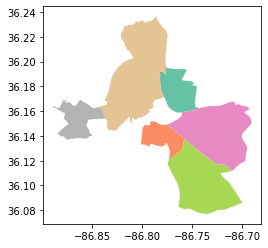

In [13]:

promise_zones.plot(cmap='Set2')

In [14]:
#adding geomtery column with lambda and point
the_output['2019-06-01-00-00']['geometry'] = the_output['2019-06-01-00-00'].apply(lambda x: Point(x['longitude'], 
                                                         x['latitude']), axis=1)
the_output['2019-06-01-00-00'].head(3)

/var/folders/0j/wl_2hyp13198px6zb01hnsxm0000gn/T/ipykernel_37448/2522485517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_output['2019-06-01-00-00']['geometry'] = the_output['2019-06-01-00-00'].apply(lambda x: Point(x['longitude'],


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5,POINT (-86.7534 36.1202)
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5,POINT (-86.7765 36.163)
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5,POINT (-86.7533 36.1202)


In [15]:

#made a geodf
one_hour_geodf = gpd.GeoDataFrame(the_output['2019-06-01-00-00'],
                           crs = promise_zones.crs,
                           geometry = the_output['2019-06-01-00-00']['geometry'])
one_hour_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5,POINT (-86.75340 36.12020)
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5,POINT (-86.77650 36.16300)
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5,POINT (-86.75330 36.12020)
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5,POINT (-86.75300 36.12010)
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5,POINT (-86.78060 36.16220)


In [16]:
#spatial join
june_1_1AM_geodf = gpd.sjoin(one_hour_geodf, promise_zones, op="within")
june_1_1AM_geodf.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5,POINT (-86.75340 36.12020),3,4,4,2.713638e+08,74348.596054
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5,POINT (-86.75330 36.12020),3,4,4,2.713638e+08,74348.596054
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5,POINT (-86.75300 36.12010),3,4,4,2.713638e+08,74348.596054
10,2019-06-01 00:00:12,36.1197,-86.7531,Powered4cc3708c-16e6-59e9-afdf-c706edce8145,39.0,5,POINT (-86.75310 36.11970),3,4,4,2.713638e+08,74348.596054
11,2019-06-01 00:00:12,36.1198,-86.7535,Powered28475498-038b-5b25-89eb-6eda986b7b33,42.0,5,POINT (-86.75350 36.11980),3,4,4,2.713638e+08,74348.596054


In [17]:
#number of 
june_1_1AM_geodf['ZONE_ID'].value_counts()

4    6892
5    3518
1    2869
2    2783
3     618
6      28
Name: ZONE_ID, dtype: int64